# Clinical Trial Data Transformation Project

This project builds a pipeline to clean, transform, and analyze synthetic clinical trial data.


#Loading the Dataset

In [2]:
import pandas as pd

df = pd.read_csv('synthetic_clinical_trials.csv')  # change path if needed
df.head()  # show first 5 rows


,Trial ID,Patient ID,Study Title,Condition,Phase,Status,Start Date,End Date,Age,Gender,Location,Dosage (mg),Response
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,23b8c1e9-3924-46de-beb1-3b9046685257,Quality throughout beautiful instead.,Diabetes,Phase IV,Terminated,2020-06-30,2021-04-17,47,Other,East William,57.45,No Change
1,b74d0fb1-32e7-4629-8fad-c1a606cb0fb3,6b65a6a4-8b81-48f6-b38a-088ca65ed389,Last everything thank serve civil.,COVID-19,Phase II,Withdrawn,2022-03-02,2023-08-12,56,Male,Ericmouth,47.93,Worsened
2,18c26797-6142-4a7d-97be-31111a2a73ed,9a8dca03-580d-4b71-98f5-64135be6128e,Southern role movie win her.,Cancer,Phase IV,Recruiting,2022-09-19,2023-12-18,46,Other,Barbaraland,59.72,Worsened
3,c5e7ce8a-3a57-4a8e-a948-8d990bbb2599,daf61a26-146d-4f31-bc37-7a4c4a15544d,Term herself law street class.,Hypertension,Phase I,Completed,2021-11-17,2022-10-08,34,Female,Jacquelineland,72.85,No Change
4,88bd6407-2bcf-4e01-a28d-efe39bf00273,7656af72-29d4-4eef-beab-edcbbaa80dd4,Establish understand read detail food shoulder.,Hypertension,Phase I,Withdrawn,2020-08-09,2022-07-21,75,Male,Port Leslieview,46.49,No Change


#Data Exploration

In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Trial ID     500 non-null    object 
 1   Patient ID   500 non-null    object 
 2   Study Title  500 non-null    object 
 3   Condition    500 non-null    object 
 4   Phase        500 non-null    object 
 5   Status       500 non-null    object 
 6   Start Date   500 non-null    object 
 7   End Date     500 non-null    object 
 8   Age          500 non-null    int64  
 9   Gender       500 non-null    object 
 10  Location     500 non-null    object 
 11  Dosage (mg)  500 non-null    float64
 12  Response     500 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 50.9+ KB


,0
Trial ID,0
Patient ID,0
Study Title,0
Condition,0
Phase,0
Status,0
Start Date,0
End Date,0
Age,0
Gender,0


#Data Cleaning

In [5]:
df_cleaned = df.copy()
df_cleaned.drop_duplicates(inplace=True)
df_cleaned.dropna(subset=['Study Title', 'Start Date'], inplace=True)
df_cleaned.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "") for col in df_cleaned.columns]
df_cleaned.head()


,trial_id,patient_id,study_title,condition,phase,status,start_date,end_date,age,gender,location,dosage_mg,response
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,23b8c1e9-3924-46de-beb1-3b9046685257,Quality throughout beautiful instead.,Diabetes,Phase IV,Terminated,2020-06-30,2021-04-17,47,Other,East William,57.45,No Change
1,b74d0fb1-32e7-4629-8fad-c1a606cb0fb3,6b65a6a4-8b81-48f6-b38a-088ca65ed389,Last everything thank serve civil.,COVID-19,Phase II,Withdrawn,2022-03-02,2023-08-12,56,Male,Ericmouth,47.93,Worsened
2,18c26797-6142-4a7d-97be-31111a2a73ed,9a8dca03-580d-4b71-98f5-64135be6128e,Southern role movie win her.,Cancer,Phase IV,Recruiting,2022-09-19,2023-12-18,46,Other,Barbaraland,59.72,Worsened
3,c5e7ce8a-3a57-4a8e-a948-8d990bbb2599,daf61a26-146d-4f31-bc37-7a4c4a15544d,Term herself law street class.,Hypertension,Phase I,Completed,2021-11-17,2022-10-08,34,Female,Jacquelineland,72.85,No Change
4,88bd6407-2bcf-4e01-a28d-efe39bf00273,7656af72-29d4-4eef-beab-edcbbaa80dd4,Establish understand read detail food shoulder.,Hypertension,Phase I,Withdrawn,2020-08-09,2022-07-21,75,Male,Port Leslieview,46.49,No Change


#Feature Engineering

In [6]:
#converts dates from strings to actual data format
df_cleaned['start_date'] = pd.to_datetime(df_cleaned['start_date'])
df_cleaned['end_date'] = pd.to_datetime(df_cleaned['end_date'])
#calculates how long the trial lasted
df_cleaned['trial_duration_days'] = (df_cleaned['end_date'] - df_cleaned['start_date']).dt.days
#adds true is a person is elderly
df_cleaned['is_elderly'] = df_cleaned['age'] > 65
#gives the phases a number so you can work with it easily
phase_map = {'Phase I': 1, 'Phase II': 2, 'Phase III': 3, 'Phase IV': 4}
#applies that to a new column called phase_code
df_cleaned['phase_code'] = df_cleaned['phase'].map(phase_map)
df_cleaned.head()


,trial_id,patient_id,study_title,condition,phase,status,start_date,end_date,age,gender,location,dosage_mg,response,trial_duration_days,is_elderly,phase_code
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,23b8c1e9-3924-46de-beb1-3b9046685257,Quality throughout beautiful instead.,Diabetes,Phase IV,Terminated,2020-06-30,2021-04-17,47,Other,East William,57.45,No Change,291,False,4
1,b74d0fb1-32e7-4629-8fad-c1a606cb0fb3,6b65a6a4-8b81-48f6-b38a-088ca65ed389,Last everything thank serve civil.,COVID-19,Phase II,Withdrawn,2022-03-02,2023-08-12,56,Male,Ericmouth,47.93,Worsened,528,False,2
2,18c26797-6142-4a7d-97be-31111a2a73ed,9a8dca03-580d-4b71-98f5-64135be6128e,Southern role movie win her.,Cancer,Phase IV,Recruiting,2022-09-19,2023-12-18,46,Other,Barbaraland,59.72,Worsened,455,False,4
3,c5e7ce8a-3a57-4a8e-a948-8d990bbb2599,daf61a26-146d-4f31-bc37-7a4c4a15544d,Term herself law street class.,Hypertension,Phase I,Completed,2021-11-17,2022-10-08,34,Female,Jacquelineland,72.85,No Change,325,False,1
4,88bd6407-2bcf-4e01-a28d-efe39bf00273,7656af72-29d4-4eef-beab-edcbbaa80dd4,Establish understand read detail food shoulder.,Hypertension,Phase I,Withdrawn,2020-08-09,2022-07-21,75,Male,Port Leslieview,46.49,No Change,711,True,1


#Saving Cleaned Data

In [7]:
df_cleaned.to_csv('cleaned_clinical_trials.csv', index=False)
from google.colab import files
files.download('cleaned_clinical_trials.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Visualizations

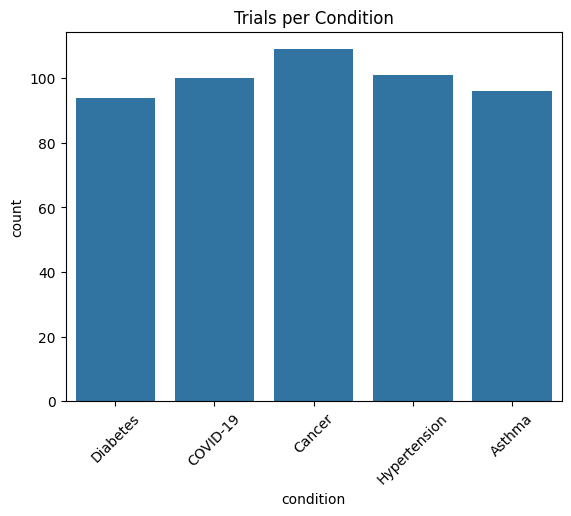

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_cleaned, x='condition')
plt.title('Trials per Condition')
plt.xticks(rotation=45)
plt.show()
